In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/exercise

/content/drive/MyDrive/exercise


**xlsx to CSV**
[xlsx를 csv로 바꾸기](https://velog.io/@ash3767/xlsx-%EB%A5%BC-csv-%EB%A1%9C-%EB%B0%94%EA%BE%B8%EA%B8%B0)

In [ ]:
!pip install xlrd
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
import os

from tqdm import tqdm

In [ ]:
ls raw_data/

 KS_NFA_FTNESS_MESURE_ITEM_MESURE_INFO_202205.csv
 KS_NFA_FTNESS_MESURE_MVM_PRSCRPTN_INFO_202205.csv
'체력 측정별 운동처방 데이터_컬럼정의서.xls'
'체력측정 항목별 측정 데이터_컬럼정의서.csv'
'체력측정 항목별 측정 데이터_컬럼정의서.xls'


In [ ]:
# Data의 Raw 폴더에서 측정별 운동 처방 데이터와, 항목별 측정 데이터를 각각 mvm_list, item_list에 불러와 mvm_df, item_df로 병합
dir_path = "./raw_data/"
mvm_list = []
item_list = []
for (root, _, files) in os.walk(dir_path):
    for file in files:
      if 'MVM' in file:
          mvm_list.append(pd.read_csv(root+file))
      elif 'ITEM' in file:
          item_list.append(pd.read_csv(root+file))

mvm_df_origin = pd.concat(mvm_list, ignore_index=True)
item_df_origin = pd.concat(item_list, ignore_index=True)

In [ ]:
print(f'mvm_df_origin.shape : {mvm_df_origin.shape}, item_df_origin : {item_df_origin.shape}')

mvm_df_origin.shape : (32950, 10), item_df_origin : (44353, 50)


# Column selection

## item Column Definition

In [ ]:
xlsx = pd.read_excel(dir_path+'체력측정 항목별 측정 데이터_컬럼정의서.xls')
xlsx.to_csv(dir_path+"체력측정 항목별 측정 데이터_컬럼정의서.csv")

In [ ]:
# 체력측정 항목별 측정 데이터 컬럼 정의서 Load
# item_column_df = pd.read_excel(dir_path+'체력측정 항목별 측정 데이터_컬럼정의서.xls')[['컬럼영문명','컬럼한글명']]
item_column_df = pd.read_csv(dir_path+'체력측정 항목별 측정 데이터_컬럼정의서.csv')[['컬럼영문명','컬럼한글명']]
item_column_df['컬럼한글명'] = item_column_df['컬럼한글명'].apply(lambda x : x.replace('측정항목값 : ',''))
item_column_df = item_column_df.T
item_column_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
컬럼영문명,MESURE_TME,CNTER_NM,AGE_FLAG_NM,MESURE_PLACE_FLAG_NM,MESURE_AGE_CO,INPT_FLAG_NM,COAW_FLAG_NM,MESURE_DAY,SEXDSTN_FLAG_CD,MESURE_IEM_001_VALUE,...,MESURE_IEM_032_VALUE,MESURE_IEM_033_VALUE,MESURE_IEM_034_VALUE,MESURE_IEM_035_VALUE,MESURE_IEM_036_VALUE,MESURE_IEM_037_VALUE,MESURE_IEM_038_VALUE,MESURE_IEM_039_VALUE,MESURE_IEM_040_VALUE,MESURE_IEM_041_VALUE
컬럼한글명,측정회차,센터명,연령구분명,측정장소구분명,측정연령수,입력구분명,상장구분명,측정일,성별구분코드,신장(cm),...,트레드밀_3분 : bpm,트레드밀_6분 : bpm,트레드밀_9분 : bpm,트레드밀(출력) : VO₂max,스텝검사_회복시 심박수 : bpm,스텝검사(출력) : VO₂max,허벅지_좌,허벅지_우,전신반응(초),체공시간2(초)


## Drop the mvm columns

In [ ]:
mvm_df_origin.head(10)

,MESURE_TME,CNTER_NM,AGE_FLAG_NM,MESURE_PLACE_FLAG_NM,MESURE_AGE_CO,INPT_FLAG_NM,COAW_FLAG_NM,MESURE_DE,MVM_PRSCRPTN_CN,SEXDSTN_FLAG_CD
0,1,사천,청소년,출장,16,관리자,참가증,20220502,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:발 바꿔 뛰기,엎드려 팔다리 교차올리...",F
1,1,사천,청소년,출장,16,관리자,참가증,20220502,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:발 바꿔 뛰기,엎드려 팔다리 교차올리...",M
2,3,사천,청소년,출장,16,관리자,참가증,20220502,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:발 바꿔 뛰기,엎드려 팔다리 교차올리...",M
3,3,사천,청소년,출장,16,관리자,참가증,20220502,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:발 바꿔 뛰기,엎드려 팔다리 교차올리...",M
4,1,정읍,청소년,출장,17,관리자,참가증,20220502,"본운동:팔굽혀 펴기,뒤로 팔굽혀펴기,다리 뻗어 올리기,앉았다 일어서기",F
5,1,정읍,청소년,출장,18,관리자,참가증,20220502,"준비운동:걷기,조깅,자전거타기",F
6,1,정읍,청소년,출장,16,관리자,참가증,20220502,"본운동:팔굽혀 펴기,뒤로 팔굽혀펴기,다리 뻗어 올리기,앉았다 일어서기",F
7,2,정읍,청소년,출장,17,관리자,3등급,20220502,"준비운동:걷기,조깅,자전거타기",F
8,2,정읍,청소년,출장,18,관리자,참가증,20220502,"준비운동:걷기,조깅,자전거타기",F
9,1,영암,청소년,출장,18,관리자,참가증,20220502,"준비운동:전신 루틴 스트레칭,정적 스트레칭 루틴프로그램,동적 스트레칭 루틴프로그램...",M


In [ ]:
print(mvm_df_origin["MESURE_PLACE_FLAG_NM"].unique())
print(mvm_df_origin["INPT_FLAG_NM"].unique())
print(mvm_df_origin["COAW_FLAG_NM"].unique())

['출장' '일반']
['관리자' '인바디' nan]
['참가증' '3등급' '2등급' '1등급']


In [ ]:
mvm_df = mvm_df_origin.drop(['MESURE_PLACE_FLAG_NM','INPT_FLAG_NM'],axis=1)

In [ ]:
mvm_df.head(3)

,MESURE_TME,CNTER_NM,AGE_FLAG_NM,MESURE_AGE_CO,COAW_FLAG_NM,MESURE_DE,MVM_PRSCRPTN_CN,SEXDSTN_FLAG_CD
0,1,사천,청소년,16,참가증,20220502,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:발 바꿔 뛰기,엎드려 팔다리 교차올리...",F
1,1,사천,청소년,16,참가증,20220502,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:발 바꿔 뛰기,엎드려 팔다리 교차올리...",M
2,3,사천,청소년,16,참가증,20220502,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:발 바꿔 뛰기,엎드려 팔다리 교차올리...",M


## Drop the item columns

In [ ]:
item_df_origin.head(3)

,MESURE_TME,CNTER_NM,AGE_FLAG_NM,MESURE_PLACE_FLAG_NM,MESURE_AGE_CO,INPT_FLAG_NM,COAW_FLAG_NM,MESURE_DAY,SEXDSTN_FLAG_CD,MESURE_IEM_001_VALUE,...,MESURE_IEM_032_VALUE,MESURE_IEM_033_VALUE,MESURE_IEM_034_VALUE,MESURE_IEM_035_VALUE,MESURE_IEM_036_VALUE,MESURE_IEM_037_VALUE,MESURE_IEM_038_VALUE,MESURE_IEM_039_VALUE,MESURE_IEM_040_VALUE,MESURE_IEM_041_VALUE
0,1,태백,청소년,출장,14,관리자,참가증,20220502,F,167.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,천안,성인,일반,21,관리자,참가증,20220502,M,177.4,...,NaN,NaN,NaN,NaN,104.0,43.6,NaN,NaN,0.274,NaN
2,2,태백,청소년,출장,14,관리자,참가증,20220502,M,180.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
item_df = item_df_origin[['MESURE_TME', 'CNTER_NM', 'AGE_FLAG_NM', 'MESURE_AGE_CO', 'COAW_FLAG_NM','MESURE_DAY', 'SEXDSTN_FLAG_CD','MESURE_IEM_001_VALUE','MESURE_IEM_002_VALUE','MESURE_IEM_018_VALUE']]

In [ ]:
item_df.head(3)

,MESURE_TME,CNTER_NM,AGE_FLAG_NM,MESURE_AGE_CO,COAW_FLAG_NM,MESURE_DAY,SEXDSTN_FLAG_CD,MESURE_IEM_001_VALUE,MESURE_IEM_002_VALUE,MESURE_IEM_018_VALUE
0,1,태백,청소년,14,참가증,20220502,F,167.0,70.6,25.3
1,4,천안,성인,21,참가증,20220502,M,177.4,90.8,28.9
2,2,태백,청소년,14,참가증,20220502,M,180.5,72.9,22.4


## Merge MVM & ITEM

* Unique ID가 존재하지 않기 때문에 기준열에서 중복되는 항목 모두 제거

In [ ]:
mvm_drop = mvm_df.drop_duplicates(['MESURE_TME', 'CNTER_NM', 'AGE_FLAG_NM', 'MESURE_AGE_CO', 'COAW_FLAG_NM', 'MESURE_DE', 'SEXDSTN_FLAG_CD'],keep=False).reset_index(drop=True)
item_drop = item_df.drop_duplicates(['MESURE_TME', 'CNTER_NM', 'AGE_FLAG_NM', 'MESURE_AGE_CO', 'COAW_FLAG_NM', 'MESURE_DAY', 'SEXDSTN_FLAG_CD'], keep=False).reset_index(drop=True)

In [ ]:
mvm_drop.rename(columns={"MESURE_DE":"MESURE_DAY"},inplace=True)
print(mvm_drop.shape, item_drop.shape)

(10171, 8) (12039, 10)


* 측정별 운동 처방 데이터와, 항목별 측정 데이터 병합
* 병합 완료 후 필요없어진 컬럼 제거

In [ ]:
merge_df = pd.merge(mvm_drop, item_drop, on=['MESURE_TME', 'CNTER_NM', 'AGE_FLAG_NM', 'MESURE_AGE_CO', 'COAW_FLAG_NM', 'MESURE_DAY', 'SEXDSTN_FLAG_CD'], how='inner')
merge_df.drop(['MESURE_TME','CNTER_NM','AGE_FLAG_NM'],axis=1,inplace=True)
print(merge_df.shape)

(10081, 8)


In [ ]:
merge_df.head()

,MESURE_AGE_CO,COAW_FLAG_NM,MESURE_DAY,MVM_PRSCRPTN_CN,SEXDSTN_FLAG_CD,MESURE_IEM_001_VALUE,MESURE_IEM_002_VALUE,MESURE_IEM_018_VALUE
0,23,2등급,20220502,"준비운동:정적 스트레칭 루틴프로그램 / 본운동:전완대고 버티기,윗몸 일으키기,앉아...",F,159.2,56.2,22.2
1,23,참가증,20220502,"준비운동:정적 스트레칭 루틴프로그램 / 본운동:전완대고 버티기,윗몸 일으키기,앉아...",F,161.9,62.7,23.9
2,21,참가증,20220502,"준비운동:하지 루틴 스트레칭1,상지 루틴 스트레칭 / 본운동:서서 다리로 탄력밴드 ...",F,164.1,49.0,18.2
3,20,참가증,20220502,"준비운동:정적 스트레칭 루틴프로그램 / 본운동:전완대고 버티기,윗몸 일으키기,앉아...",F,168.0,66.4,23.5
4,16,3등급,20220502,"본운동:팔굽혀 펴기,뒤로 팔굽혀펴기,다리 뻗어 올리기,앉았다 일어서기",M,174.8,74.6,24.4


# Data Preprocessing
## Split columns - Pre, Main, Finish exercise
* 운동 목록에 준비운동, 본운동, 마무리운동이 하나의 컬럼으로 구성되어 있음
* 이를 각각의 컬럼으로 분리하는 작업 수행

## Exercise string to list

In [ ]:
merge_df['split'] = merge_df['MVM_PRSCRPTN_CN'].apply(lambda x : x.split(' / '))
to_list_df = merge_df.drop('MVM_PRSCRPTN_CN',axis=1)

## Filter only 3 exercise
* 운동 루틴을 위해서는 3가지 운동 목록이 모두 존재해야하므로 만족하지 않는 행 제거

In [ ]:
to_list_df['len_ex'] = to_list_df.apply(lambda x : len(x['split']), axis=1) # 운동 개수 열 생성
filter_df = to_list_df.loc[to_list_df['len_ex']==3].copy().drop('len_ex',axis=1).reset_index(drop=True) # 운동 개수가 3인 행만 필터링

## Split columns

In [ ]:
# input : DataFrame, remove keyword
# return : Series

def split_col(df, keyword): # keyword : 준비운동, 본운동, 마무리운동
    index =  0 if keyword == '준비운동' else 1 if keyword == '본운동' else 2 if keyword =='마무리운동' else -1
    if index == -1:
        raise NameError('준비운동, 본운동, 마무리운동 이외의 값이 입력됐습니다.') 
    return df['split'].apply(lambda x : x[index].replace(keyword+':','')).copy()

In [ ]:

# 컬럼 분리
pre_ex_col = split_col(filter_df, '준비운동')
main_ex_col = split_col(filter_df, '본운동')
finish_ex_col = split_col(filter_df, '마무리운동')

# 컬럼 명 변경
pre_ex_col.name = 'PRE_EX'
main_ex_col.name = 'MAIN_EX'
finish_ex_col.name = 'FINISH_EX'

In [ ]:
filter_df.head()

,MESURE_AGE_CO,COAW_FLAG_NM,MESURE_DAY,SEXDSTN_FLAG_CD,MESURE_IEM_001_VALUE,MESURE_IEM_002_VALUE,MESURE_IEM_018_VALUE,split
0,23,2등급,20220502,F,159.2,56.2,22.2,"[준비운동:정적 스트레칭 루틴프로그램, 본운동:전완대고 버티기,윗몸 일으키기,앉아..."
1,23,참가증,20220502,F,161.9,62.7,23.9,"[준비운동:정적 스트레칭 루틴프로그램, 본운동:전완대고 버티기,윗몸 일으키기,앉아..."
2,21,참가증,20220502,F,164.1,49.0,18.2,"[준비운동:하지 루틴 스트레칭1,상지 루틴 스트레칭, 본운동:서서 다리로 탄력밴드 ..."
3,20,참가증,20220502,F,168.0,66.4,23.5,"[준비운동:정적 스트레칭 루틴프로그램, 본운동:전완대고 버티기,윗몸 일으키기,앉아..."
4,26,3등급,20220502,M,176.6,83.6,26.8,"[준비운동:동적 스트레칭 루틴프로그램,자가근막이완술 루틴 스트레칭,실내 자전거타기,..."


## Exercise name unify

In [ ]:
ex_name_dict = {'회전근개 스트레칭2':'회전근개 스트레칭','골다공증을 위한 근력운동2':'골다공증을 위한 근력운동','골다공증을 위한 근력운동1':'골다공증을 위한 근력운동','엉덩이 스트레칭2':'엉덩이 스트레칭',
                '골반 스트레칭2':'골반 스트레칭','관절염을 위한 근력운동2':'관절염을 위한 근력운동','관절염을 위한 근력운동1':'관절염을 위한 근력운동','순간반응 콘 찍기 2':'순간반응 콘 찍기',
                '마주 앉아 대퇴이두근 스트레칭2':'마주 앉아 대퇴이두근 스트레칭','2단 줄넘기':'줄넘기','1단 줄넘기':'줄넘기','줄넘기 운동':'줄넘기','대퇴이두근 스트레칭2':'대퇴이두근 스트레칭',
                '요통을 위한 스트레칭2':'요통을 위한 스트레칭','요통을 위한 스트레칭1':'요통을 위한 스트레칭','하지 루틴 스트레칭1':'하지 루틴 스트레칭','하지 루틴 스트레칭2':'하지 루틴 스트레칭',
                '계단 두 칸씩 뛰기':'계단 뛰기','계단 두발 뛰기':'계단 뛰기','계단 뛰어 오르기':'계단 뛰기','계단 한발 뛰기':'계단 뛰기','계단 뛰어 오르기':'계단 뛰기',
                '넙다리 뒤쪽 스트레칭':'넙다리 스트레칭','넙다리 안쪽 스트레칭':'넙다리 스트레칭','넙다리 앞쪽 스트레칭':'넙다리 스트레칭','목 굽힘/ 폄 I':'목 굽힘/ 폄',
                '목 굽힘/ 폄 II':'목 굽힘/ 폄','목 굽힘/ 폄 III':'목 굽힘/ 폄','누워서 배가로근 수축 I':'누워서 배가로근 수축','누워서 배가로근 수축 II':'누워서 배가로근 수축',
                '서서 다리로 탄력밴드 당기기 II':'서서 다리로 탄력밴드 당기기','서서 다리로 탄력밴드 당기기 I':'서서 다리로 탄력밴드 당기기','등척성운동-바깥돌림':'등척성운동',
                '등척성운동-벌림':'등척성운동','등척성운동-안쪽 돌림':'등척성운동','목 당기기':'목 스트레칭','목 돌리기':'목 스트레칭','목 돌림 스트레칭':'목 스트레칭',
                '바벨 잡고 들어올리기':'바벨들어올리기','버피 테스트':'버피운동','베개 밟고 교차 서기':'베개 밟고 서기','베개 밟고 대각방향으로 서기':'베개 밟고 서기','베개 밟고 두발 모아 서기':'베개 밟고 서기',
                '베개 밟고 서기':'베게 밟고 서기','베개 밟고 서기 평형성 운동 루틴 프로그램':'베개 밟고 서기', '사다리 운동  루틴프로그램':'사다리 이용 루틴 운동','실내 자전거타기':'자전거타기',
                '실외 자전거타기':'자전거타기','고정식 자전거 타기':'자전거타기','아쿠아로빅':'아쿠아로빅', '아쿠아로빅-몸 기울이기/회전하기':'아쿠아로빅', '아쿠아로빅-물누르기/올리기':'아쿠아로빅',
                '아쿠아로빅-물당기기/밀기':'아쿠아로빅','아쿠아로빅-발 닿기':'아쿠아로빅','아쿠아로빅-엉덩관절 회전하기':'아쿠아로빅','아쿠아로빅-옆구리 늘리기':'아쿠아로빅',
                '고정식 트레드밀에서 걷기':'걷기', '트레드밀에서 걷기':'걷기','조깅':'달리기','배스트레칭':'배 스트레칭','윗몸말아올리기':'윗몸 말아 올리기'}
     

In [ ]:
split_df = pd.concat([filter_df,pre_ex_col,main_ex_col,finish_ex_col],axis=1).drop('split',axis = 1)

In [ ]:

# ex_name_dict을 참고하여 운동 이름을 통일
# input : DataFrame
# output : DataFrame

def unify_name(df):
    tmp_list = []
    index = df.name
    column_list = df.index.values[-3:]
    for column in column_list:
        ex_list = df[column].split(',')
        for i in range(len(ex_list)):
            ex_list[i] = ex_list[i].strip()
            if '  ' in ex_list[i]:
                ex_list[i] = ex_list[i].replace('  ',' ')
            if ex_list[i] in ex_name_dict:
                ex_list[i] = ex_name_dict[ex_list[i]]
        df[column] = ','.join(ex_list)
    return df
     

In [ ]:
unify_df = split_df.apply(unify_name,axis=1)

# Missing value & Outlier
## Missing Value

In [ ]:
unify_df.isnull().sum()

MESURE_AGE_CO           0
COAW_FLAG_NM            0
MESURE_DAY              0
SEXDSTN_FLAG_CD         0
MESURE_IEM_001_VALUE    1
MESURE_IEM_002_VALUE    2
MESURE_IEM_018_VALUE    0
PRE_EX                  0
MAIN_EX                 0
FINISH_EX               0
dtype: int64

* CERT_GBN : 상장구분
* ITEM_F001 : 신장(cm)
* ITEM_F002 : 몸무게
* ITEM_F018 : BMI
* 상장구분, 신장, 몸무게의 경우 신체 특성에 중요한 부분이므로 결측치이면 제거

In [ ]:
# 신장 결측치
unify_df[unify_df['MESURE_IEM_001_VALUE'].isnull()].head(4)

,MESURE_AGE_CO,COAW_FLAG_NM,MESURE_DAY,SEXDSTN_FLAG_CD,MESURE_IEM_001_VALUE,MESURE_IEM_002_VALUE,MESURE_IEM_018_VALUE,PRE_EX,MAIN_EX,FINISH_EX
5120,24,참가증,20220525,F,NaN,64.3,0.3,전신 루틴 스트레칭,"걷기,자전거타기,엎드려 버티기,윗몸올리기,누워서 엉덩이 들어올리기,앉았다 일어서기,...","폼롤러 이용 유연성운동 루틴 프로그램,자가근막이완술 루틴 스트레칭"


In [ ]:
# 몸무게 결측치
unify_df[unify_df['MESURE_IEM_002_VALUE'].isnull()].head(4)

,MESURE_AGE_CO,COAW_FLAG_NM,MESURE_DAY,SEXDSTN_FLAG_CD,MESURE_IEM_001_VALUE,MESURE_IEM_002_VALUE,MESURE_IEM_018_VALUE,PRE_EX,MAIN_EX,FINISH_EX
3604,80,참가증,20220518,M,163.0,NaN,248.4,"짐볼을 이용한 동적 루틴 스트레칭,걷기,자전거타기","수영,서서 다리 모으고 벌리기,몸통 들어올리기,스텝박스 오르내리기,의자 이용 중심 ...","누워서 전신 뻗기,옆구리 스트레칭,어깨 스트레칭,의자이용 유연성운동 루틴 프로그램"
4223,38,참가증,20220521,M,179.4,NaN,125.9,유산소 운동 전 동적 루틴 스트레칭,"앉았다 일어서기,한발 앞으로 내밀고 앉았다 일어서기,팔굽혀펴기,앉아서 밀기,앉아서 ...",전신 루틴 스트레칭


In [ ]:
# 상장등급 결측치 확인
unify_df[unify_df['COAW_FLAG_NM'].isnull()]

,MESURE_AGE_CO,COAW_FLAG_NM,MESURE_DAY,SEXDSTN_FLAG_CD,MESURE_IEM_001_VALUE,MESURE_IEM_002_VALUE,MESURE_IEM_018_VALUE,PRE_EX,MAIN_EX,FINISH_EX


In [ ]:

drop_cond = (unify_df['MESURE_IEM_001_VALUE'].isnull()) | (unify_df['MESURE_IEM_002_VALUE'].isnull()) | (unify_df['COAW_FLAG_NM'].isnull())
drop_na_df = unify_df.drop(unify_df[drop_cond].index)
drop_na_df.head(4)

,MESURE_AGE_CO,COAW_FLAG_NM,MESURE_DAY,SEXDSTN_FLAG_CD,MESURE_IEM_001_VALUE,MESURE_IEM_002_VALUE,MESURE_IEM_018_VALUE,PRE_EX,MAIN_EX,FINISH_EX
0,23,2등급,20220502,F,159.2,56.2,22.2,정적 스트레칭 루틴프로그램,"전완대고 버티기,윗몸 일으키기,앉아서 다리 밀기,앉아서 다리 펴기,뒤꿈치 들기,누워...","걷기,정적 스트레칭 루틴프로그램"
1,23,참가증,20220502,F,161.9,62.7,23.9,정적 스트레칭 루틴프로그램,"전완대고 버티기,윗몸 일으키기,앉아서 다리 밀기,앉아서 다리 펴기,뒤꿈치 들기,누워...","걷기,정적 스트레칭 루틴프로그램"
2,21,참가증,20220502,F,164.1,49.0,18.2,"하지 루틴 스트레칭,상지 루틴 스트레칭","서서 다리로 탄력밴드 당기기,서서 다리로 탄력밴드 당기기,엎드려 팔다리 교차올리기,...","걷기,달리기"
3,20,참가증,20220502,F,168.0,66.4,23.5,정적 스트레칭 루틴프로그램,"전완대고 버티기,윗몸 일으키기,앉아서 다리 밀기,앉아서 다리 펴기,뒤꿈치 들기,누워...","걷기,정적 스트레칭 루틴프로그램"


In [ ]:
# 결측지 제거 확인
drop_na_df.isnull().sum()

MESURE_AGE_CO           0
COAW_FLAG_NM            0
MESURE_DAY              0
SEXDSTN_FLAG_CD         0
MESURE_IEM_001_VALUE    0
MESURE_IEM_002_VALUE    0
MESURE_IEM_018_VALUE    0
PRE_EX                  0
MAIN_EX                 0
FINISH_EX               0
dtype: int64

In [ ]:
# 상장 등급 정상값 확인 및 분포
drop_na_df['COAW_FLAG_NM'].value_counts()

참가증    2785
3등급    1392
2등급    1140
1등급     609
Name: COAW_FLAG_NM, dtype: int64

In [ ]:
# 상장 등급에 참가증, 3등급, 2등급, 1등급 외 다른 값있으면 삭제
valid_cert_list = ['참가증','3등급','2등급','1등급']
drop_na_df = drop_na_df[drop_na_df['COAW_FLAG_NM'].apply(lambda x : True if x in valid_cert_list else False)]

In [ ]:
drop_na_df['COAW_FLAG_NM'].value_counts()

참가증    2785
3등급    1392
2등급    1140
1등급     609
Name: COAW_FLAG_NM, dtype: int64

In [ ]:
drop_na_df.head()

,MESURE_AGE_CO,COAW_FLAG_NM,MESURE_DAY,SEXDSTN_FLAG_CD,MESURE_IEM_001_VALUE,MESURE_IEM_002_VALUE,MESURE_IEM_018_VALUE,PRE_EX,MAIN_EX,FINISH_EX
0,23,2등급,20220502,F,159.2,56.2,22.2,정적 스트레칭 루틴프로그램,"전완대고 버티기,윗몸 일으키기,앉아서 다리 밀기,앉아서 다리 펴기,뒤꿈치 들기,누워...","걷기,정적 스트레칭 루틴프로그램"
1,23,참가증,20220502,F,161.9,62.7,23.9,정적 스트레칭 루틴프로그램,"전완대고 버티기,윗몸 일으키기,앉아서 다리 밀기,앉아서 다리 펴기,뒤꿈치 들기,누워...","걷기,정적 스트레칭 루틴프로그램"
2,21,참가증,20220502,F,164.1,49.0,18.2,"하지 루틴 스트레칭,상지 루틴 스트레칭","서서 다리로 탄력밴드 당기기,서서 다리로 탄력밴드 당기기,엎드려 팔다리 교차올리기,...","걷기,달리기"
3,20,참가증,20220502,F,168.0,66.4,23.5,정적 스트레칭 루틴프로그램,"전완대고 버티기,윗몸 일으키기,앉아서 다리 밀기,앉아서 다리 펴기,뒤꿈치 들기,누워...","걷기,정적 스트레칭 루틴프로그램"
4,26,3등급,20220502,M,176.6,83.6,26.8,"동적 스트레칭 루틴프로그램,자가근막이완술 루틴 스트레칭,자전거타기,걷기","저항밴드 운동 루틴프로그램,웨이트 트레이닝 루틴프로그램,수영,버피운동,무릎 높여 제...","전신 루틴 스트레칭,정적 스트레칭 루틴프로그램,하지 루틴 스트레칭,상지 루틴 스트레..."


## Outlier

In [ ]:
numeric_columns = ['MESURE_AGE_CO',  'MESURE_IEM_001_VALUE', 'MESURE_IEM_002_VALUE', 'MESURE_IEM_018_VALUE']

In [ ]:
# 통계값 확인
drop_na_df[numeric_columns].agg(['min','mean','median','max'])

,MESURE_AGE_CO,MESURE_IEM_001_VALUE,MESURE_IEM_002_VALUE,MESURE_IEM_018_VALUE
min,11.000000,134.200000,18.000000,5.600000
mean,35.057712,167.669322,68.155292,24.083513
median,29.000000,168.700000,67.500000,23.800000
max,91.000000,195.400000,155.400000,48.100000


### Boxplot - Before outlier processing

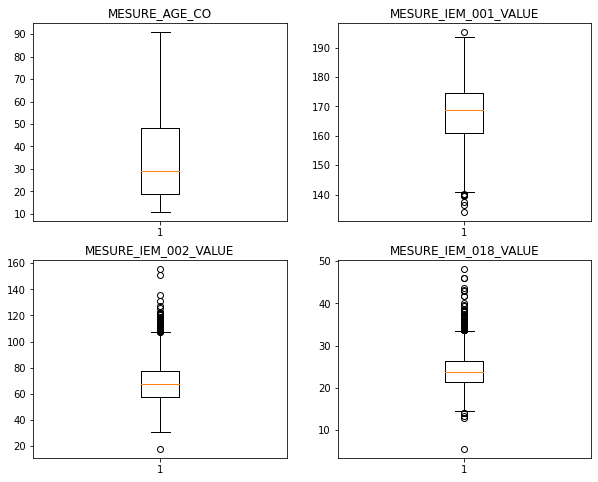

In [ ]:

plt.figure(figsize=(10,8))
for i, column in enumerate(drop_na_df[numeric_columns]):
    plt.subplot(2,2,i+1)
    plt.title(column)
    plt.boxplot(drop_na_df[column])
plt.show()

`MESURE_AGE_CO`
* 100세 미만의 데이터만 사용

In [ ]:
drop_na_df[drop_na_df['MESURE_AGE_CO']>100]

,MESURE_AGE_CO,COAW_FLAG_NM,MESURE_DAY,SEXDSTN_FLAG_CD,MESURE_IEM_001_VALUE,MESURE_IEM_002_VALUE,MESURE_IEM_018_VALUE,PRE_EX,MAIN_EX,FINISH_EX


In [ ]:
drop_na_df = drop_na_df[drop_na_df['MESURE_AGE_CO']<100].copy()

`MESURE_IEM_001_VALUE (Hight)`
* 신장이 100cm 이하 데이터 확인
* 신장이 190cm 초과 데이터 확인

In [ ]:
# 신장 100cm 이하 데이터
drop_na_df[drop_na_df['MESURE_IEM_001_VALUE']<=100]

,MESURE_AGE_CO,COAW_FLAG_NM,MESURE_DAY,SEXDSTN_FLAG_CD,MESURE_IEM_001_VALUE,MESURE_IEM_002_VALUE,MESURE_IEM_018_VALUE,PRE_EX,MAIN_EX,FINISH_EX


In [ ]:
# 신장 190cm 이하 데이터
drop_na_df[drop_na_df['MESURE_IEM_001_VALUE']>190]

,MESURE_AGE_CO,COAW_FLAG_NM,MESURE_DAY,SEXDSTN_FLAG_CD,MESURE_IEM_001_VALUE,MESURE_IEM_002_VALUE,MESURE_IEM_018_VALUE,PRE_EX,MAIN_EX,FINISH_EX
298,21,3등급,20220503,M,193.8,92.3,24.6,동적 스트레칭 루틴프로그램,"맨몸운동 루틴프로그램,전완대고 버티기,버피운동,줄넘기",정적 스트레칭 루틴프로그램
517,22,3등급,20220503,M,190.1,86.9,24.0,전신 루틴 스트레칭,"걷기,자전거타기,엎드려 버티기,윗몸올리기,누워서 엉덩이 들어올리기,앉았다 일어서기,...","폼롤러 이용 유연성운동 루틴 프로그램,자가근막이완술 루틴 스트레칭"
832,19,참가증,20220504,M,190.4,95.4,26.3,자전거타기,"계단 뛰기,엎드려 버티기,윗몸올리기,앉았다 일어서기,누워서 엉덩이 들어올리기,팔굽혀...","걷기,달리기"
857,18,2등급,20220504,M,192.6,69.1,18.6,유산소 운동 전 동적 루틴 스트레칭,"매달려서 다리 들기,손목 펴기/굽히기,윗몸올리기,달리기,줄넘기,계단 뛰기,하지 루틴...",전신 루틴 스트레칭
1988,19,참가증,20220511,M,191.4,80.4,21.9,"전신 루틴 스트레칭,정적 스트레칭 루틴프로그램,동적 스트레칭 루틴프로그램","윗몸올리기,엎드려 버티기,앉았다 일어서기,앉았다 일어서기,팔굽혀펴기,한발 앞으로 내...","전신 루틴 스트레칭,하지 루틴 스트레칭,상지 루틴 스트레칭,하지 루틴 스트레칭,자가..."
1989,23,3등급,20220511,M,190.5,67.8,18.7,"전신 루틴 스트레칭,정적 스트레칭 루틴프로그램,동적 스트레칭 루틴프로그램","윗몸올리기,엎드려 버티기,앉았다 일어서기,앉았다 일어서기,팔굽혀펴기,한발 앞으로 내...","전신 루틴 스트레칭,하지 루틴 스트레칭,상지 루틴 스트레칭,하지 루틴 스트레칭,자가..."
2014,19,참가증,20220511,M,190.5,98.5,27.1,자전거타기,"계단 뛰기,엎드려 버티기,윗몸올리기,앉았다 일어서기,누워서 엉덩이 들어올리기,팔굽혀...",걷기
2702,22,참가증,20220513,M,191.2,112.7,30.8,"하지 루틴 스트레칭,상지 루틴 스트레칭","앉았다 일어서기,한발 앞으로 내밀고 앉았다 일어서기,턱걸이,서서 상체 일으키기,팔굽...","하지 루틴 스트레칭,전신 루틴 스트레칭,자가근막이완술 루틴 스트레칭"
3845,20,3등급,20220519,M,195.4,80.8,21.2,"스텝퍼 오르내리기,팔벌려뛰기,옆으로 펀치하기,무릎 높여 제자리 달리기","버피운동,앉았다 일어서면서 점프하기,점프 팔굽혀펴기,스텝퍼 뛰어서 오르내리기,스텝퍼...","상지 루틴 스트레칭,하지 루틴 스트레칭,넙다리 스트레칭,배 스트레칭,허리 스트레칭,..."
4874,19,참가증,20220525,M,192.2,77.9,21.1,전신 루틴 스트레칭,"엎드려 버티기,앉았다 일어서기,팔굽혀펴기,무릎 높여 제자리 달리기,서서 상체 일으키...","자가근막이완술 루틴 스트레칭,허리 스트레칭,상지 루틴 스트레칭"


**BMI 지수 고려해서 키 이상치 삭제 여부 결정**
```
BMI가 18.5 이하면 저체중
18.5 ~ 22.9 사이면 정상
23.0 ~ 24.9 사이면 과체중
25.0 이상부터는 비만
```

* 현재 데이터에서 100cm 미만 데이터 존재하지 않음 - 일단은 삭제 처리
* 현재 데이터에서 190cm 이상 데이터 존재함 - BMI 지수 숫자가 정상적임 - 일단 삭제 처리 X

In [ ]:
drop_height_df = drop_na_df[drop_na_df['MESURE_IEM_001_VALUE']>=100].copy()
drop_height_df.shape

(5926, 10)

`MESURE_IEM_001_VALUE (Weight)`
* 몸무게 100kg 이상 데이터 확인

In [ ]:
drop_height_df[numeric_columns].agg(['min','mean','median','max'])

,MESURE_AGE_CO,MESURE_IEM_001_VALUE,MESURE_IEM_002_VALUE,MESURE_IEM_018_VALUE
min,11.000000,134.200000,18.000000,5.600000
mean,35.057712,167.669322,68.155292,24.083513
median,29.000000,168.700000,67.500000,23.800000
max,91.000000,195.400000,155.400000,48.100000


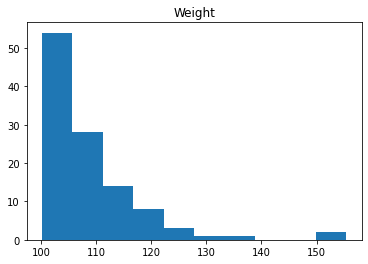

In [ ]:
# 몸무게 100kg 이상 데이터 갯수와 분포 확인
over100 = drop_height_df[drop_height_df['MESURE_IEM_002_VALUE']>100].copy()
plt.hist(over100['MESURE_IEM_002_VALUE'])
plt.title('Weight')
plt.show()

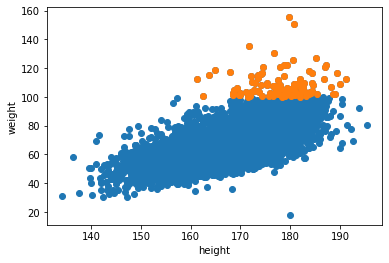

In [ ]:
# 키와 몸무게를 동시에 고려해서 판단 
plt.scatter(drop_height_df['MESURE_IEM_001_VALUE'],drop_height_df['MESURE_IEM_002_VALUE'])
plt.scatter(over100['MESURE_IEM_001_VALUE'],over100['MESURE_IEM_002_VALUE'])
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

**몸무게와 키를 동시에 고려해서 판단**
* 키가 큰 경우 상단의 그래프처럼 몸무게도 높음 - 정상적 추이로 판단 - 삭제 X

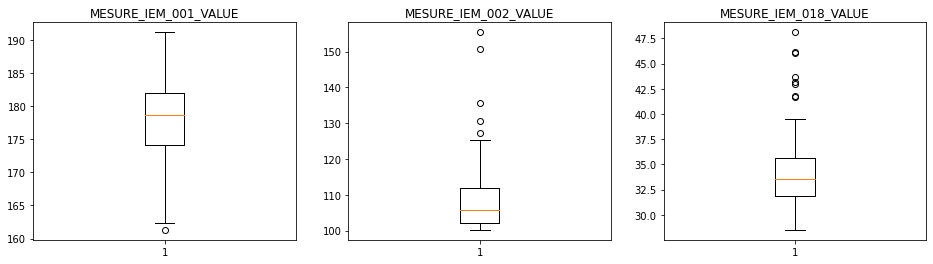

In [ ]:
test = over100[['MESURE_IEM_001_VALUE','MESURE_IEM_002_VALUE','MESURE_IEM_018_VALUE']].reset_index(drop=True)
plt.figure(figsize=(16,4))
for i, column in enumerate(test):
    plt.subplot(1,3,i+1)
    plt.title(column)
    plt.boxplot(test[column])
     

`MESURE_IEM_018_VALUE (BMI)`
* 체중 (kg) / (신장(m)*신장(m))

In [ ]:
# BMI 계산 함수
# input : DataFrame
# ouput : DataFrame
def cal_bmi(x):
    return np.round(x['MESURE_IEM_002_VALUE'] / ((x['MESURE_IEM_001_VALUE']/100)**2),1)

In [ ]:
drop_height_df['BMI'] = drop_height_df.apply(cal_bmi,axis=1)

In [ ]:
drop_height_df.head(3)

,MESURE_AGE_CO,COAW_FLAG_NM,MESURE_DAY,SEXDSTN_FLAG_CD,MESURE_IEM_001_VALUE,MESURE_IEM_002_VALUE,MESURE_IEM_018_VALUE,PRE_EX,MAIN_EX,FINISH_EX,BMI
0,23,2등급,20220502,F,159.2,56.2,22.2,정적 스트레칭 루틴프로그램,"전완대고 버티기,윗몸 일으키기,앉아서 다리 밀기,앉아서 다리 펴기,뒤꿈치 들기,누워...","걷기,정적 스트레칭 루틴프로그램",22.2
1,23,참가증,20220502,F,161.9,62.7,23.9,정적 스트레칭 루틴프로그램,"전완대고 버티기,윗몸 일으키기,앉아서 다리 밀기,앉아서 다리 펴기,뒤꿈치 들기,누워...","걷기,정적 스트레칭 루틴프로그램",23.9
2,21,참가증,20220502,F,164.1,49.0,18.2,"하지 루틴 스트레칭,상지 루틴 스트레칭","서서 다리로 탄력밴드 당기기,서서 다리로 탄력밴드 당기기,엎드려 팔다리 교차올리기,...","걷기,달리기",18.2


In [ ]:

# 입력된 BMI와 키와 몸무게로 계산된 BMI가 같지 않은 행 추출
diff = drop_height_df[drop_height_df['MESURE_IEM_018_VALUE'] != drop_height_df['BMI']][['MESURE_IEM_018_VALUE','BMI']]
diff.T

,3409
MESURE_IEM_018_VALUE,30.9
BMI,30.7


입력값과 계산값의 오차가 1보다 큰 행은 이상치로 간주, 삭제 처리

In [ ]:
condition = (diff['MESURE_IEM_018_VALUE']-diff['BMI'] > 1)
diff[condition]   

,MESURE_IEM_018_VALUE,BMI


**몸무게와 키로 계산한 BMI 수치를 사용, 기존 열은 제거**

In [ ]:
drop_index = diff[condition].index
drop_bmi_df = drop_height_df.drop(drop_index).drop('MESURE_IEM_018_VALUE',axis=1).rename(columns={'BMI':'MESURE_IEM_018_VALUE'}).copy()

In [ ]:
drop_bmi_df.head(3)

,MESURE_AGE_CO,COAW_FLAG_NM,MESURE_DAY,SEXDSTN_FLAG_CD,MESURE_IEM_001_VALUE,MESURE_IEM_002_VALUE,PRE_EX,MAIN_EX,FINISH_EX,MESURE_IEM_018_VALUE
0,23,2등급,20220502,F,159.2,56.2,정적 스트레칭 루틴프로그램,"전완대고 버티기,윗몸 일으키기,앉아서 다리 밀기,앉아서 다리 펴기,뒤꿈치 들기,누워...","걷기,정적 스트레칭 루틴프로그램",22.2
1,23,참가증,20220502,F,161.9,62.7,정적 스트레칭 루틴프로그램,"전완대고 버티기,윗몸 일으키기,앉아서 다리 밀기,앉아서 다리 펴기,뒤꿈치 들기,누워...","걷기,정적 스트레칭 루틴프로그램",23.9
2,21,참가증,20220502,F,164.1,49.0,"하지 루틴 스트레칭,상지 루틴 스트레칭","서서 다리로 탄력밴드 당기기,서서 다리로 탄력밴드 당기기,엎드려 팔다리 교차올리기,...","걷기,달리기",18.2


In [ ]:
# 통계값 확인
drop_bmi_df[['MESURE_AGE_CO','MESURE_IEM_001_VALUE','MESURE_IEM_002_VALUE','MESURE_IEM_018_VALUE']].agg(['min','mean','median','max'])

,MESURE_AGE_CO,MESURE_IEM_001_VALUE,MESURE_IEM_002_VALUE,MESURE_IEM_018_VALUE
min,11.000000,134.200000,18.000000,5.60000
mean,35.057712,167.669322,68.155292,24.08348
median,29.000000,168.700000,67.500000,23.80000
max,91.000000,195.400000,155.400000,48.10000


boxplot - After outlier processing
* 흠... 이상치 제거가 많이 된지는 모르겠다 쩝...

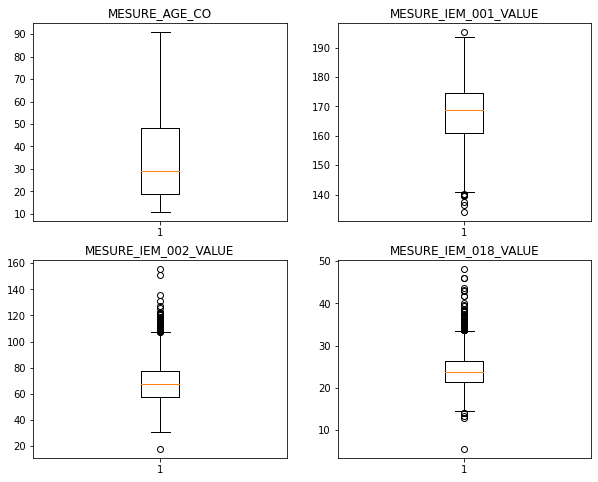

In [ ]:

plt.figure(figsize=(10,8))
for i, column in enumerate(drop_bmi_df[numeric_columns]):
    plt.subplot(2,2,i+1)
    plt.title(column)
    plt.boxplot(drop_bmi_df[column])
plt.show()

## User Grouping
* `상장 구분`, `연령층`, `성별`로 유저 그룹 생성

In [ ]:
age_labels = ['10세 미만','10대','20대','30대','40대','50대','60대','70대 이상']
bmi_labels = ['저체중','정상체중','비만전단계','1단계비만','2단계비만','3단계비만']
cert_list = ['상','중','하']
sex_labels = ['M','F']
group_case = pd.DataFrame(
                        itertools.product(age_labels,bmi_labels,sex_labels,cert_list),\
                        columns=['AGE_GROUP','BMI_GROUP','TEST_SEX','CERT_GROUP']).drop_duplicates(ignore_index=True)\
                        .reset_index().rename(columns={'index':'G_ID'})

In [ ]:
group_case.head()

,G_ID,AGE_GROUP,BMI_GROUP,TEST_SEX,CERT_GROUP
0,0,10세 미만,저체중,M,상
1,1,10세 미만,저체중,M,중
2,2,10세 미만,저체중,M,하
3,3,10세 미만,저체중,F,상
4,4,10세 미만,저체중,F,중


In [ ]:
group_case["G_ID"].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
pwd

'/content/drive/MyDrive/exercise'

In [ ]:
group_case.to_csv('./processing/user_group.csv',encoding='utf-8',index=False) 

In [ ]:
def Grouping(df, group):
    df = df.copy()
    age_bins = [0,10,20,30,40,50,60,70,df.MESURE_AGE_CO.max()]
    age_labels = ['10세 미만','10대','20대','30대','40대','50대','60대','70대 이상']
    bmi_bins = [0,18.5,23,25,30,35,df.MESURE_IEM_018_VALUE.max()]
    bmi_labels = ['저체중','정상체중','비만전단계','1단계비만','2단계비만','3단계비만']
    cert_dict = {'참가증':'하','3등급':'하','2등급':'중','1등급':'상'}

    df['AGE_GROUP'] = pd.cut(df['MESURE_AGE_CO'], bins=age_bins, labels=age_labels)
    df['BMI_GROUP'] = pd.cut(df['MESURE_IEM_018_VALUE'], bins=bmi_bins, labels=bmi_labels)
    df['CERT_GROUP'] = df.COAW_FLAG_NM.replace(cert_dict)
    ret_ = pd.merge(df,group,how='left')
    return ret_

In [ ]:
gruop_df = Grouping(drop_bmi_df, group_case)
gruop_df = gruop_df.reset_index().rename(columns={'index':'USER_ID'})

In [ ]:
sorted(gruop_df["G_ID"].unique())

[36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 61,
 62,
 64,
 65,
 67,
 68,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 97,
 98,
 100,
 101,
 104,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 133,
 134,
 136,
 137,
 140,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 170,
 173,
 176,
 179,
 181,
 182,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 206,
 209,
 212,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 241,
 242,
 244,
 245,
 248,
 251,
 2

In [ ]:
gruop_df.head(3)

,USER_ID,MESURE_AGE_CO,COAW_FLAG_NM,MESURE_DAY,SEXDSTN_FLAG_CD,MESURE_IEM_001_VALUE,MESURE_IEM_002_VALUE,PRE_EX,MAIN_EX,FINISH_EX,MESURE_IEM_018_VALUE,AGE_GROUP,BMI_GROUP,CERT_GROUP,G_ID,TEST_SEX
0,0,23,2등급,20220502,F,159.2,56.2,정적 스트레칭 루틴프로그램,"전완대고 버티기,윗몸 일으키기,앉아서 다리 밀기,앉아서 다리 펴기,뒤꿈치 들기,누워...","걷기,정적 스트레칭 루틴프로그램",22.2,20대,정상체중,중,79,M
1,1,23,2등급,20220502,F,159.2,56.2,정적 스트레칭 루틴프로그램,"전완대고 버티기,윗몸 일으키기,앉아서 다리 밀기,앉아서 다리 펴기,뒤꿈치 들기,누워...","걷기,정적 스트레칭 루틴프로그램",22.2,20대,정상체중,중,82,F
2,2,23,참가증,20220502,F,161.9,62.7,정적 스트레칭 루틴프로그램,"전완대고 버티기,윗몸 일으키기,앉아서 다리 밀기,앉아서 다리 펴기,뒤꿈치 들기,누워...","걷기,정적 스트레칭 루틴프로그램",23.9,20대,비만전단계,하,86,M


In [ ]:
gruop_df.to_csv('./processing/processed_data.csv',encoding='utf-8',index=False)